<a href="https://colab.research.google.com/github/AnushkaMishra29/Google-Stock-Price-for-Jan-2017-using-RNN-/blob/master/Google_stock_prices(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd drive

/content/drive


In [8]:
cd My Drive

/content/drive/My Drive


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [11]:
print(dataset_train)
print(training_set)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scale=sc.fit_transform(training_set)

In [13]:
print (training_set_scale)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


Creating a datastructure with 60 time steps and 1 output.
*#by doing this we will look at the previous output of 60 days before predicting*

In [14]:
X_train=[]
y_train=[]
for i in range(60,1257):
  X_train.append(training_set_scale[i-60:i,0])
  y_train.append(training_set_scale[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)       #creating into numpy array

In [15]:
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))     #X_train.shape[0] is no of stock prices i.e 0 to end,X_train.shape[1] is no f time steps i.e is 60 at a time and 1 for the no of indicators.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
regressor= Sequential()

In [18]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))     #units= neurons that we want to have in this layer, we use return_sequences as true as we will add another layer of LSTM after this layer, input shape is used to add the input that we made in x_train
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1)) #connecting input layers to output layer

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1197/1197 [==============================] - 22s 18ms/step - loss: 0.0031
Epoch 2/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0034
Epoch 3/50
1197/1197 [==============================] - 22s 18ms/step - loss: 0.0036
Epoch 4/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0034
Epoch 5/50
1197/1197 [==============================] - 22s 18ms/step - loss: 0.0030
Epoch 6/50
1197/1197 [==============================] - 22s 18ms/step - loss: 0.0033
Epoch 7/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0031
Epoch 8/50
1197/1197 [==============================] - 22s 18ms/step - loss: 0.0029
Epoch 9/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0033
Epoch 10/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0030
Epoch 11/50
1197/1197 [==============================] - 21s 18ms/step - loss: 0.0028
Epoch 12/50
1197/1197 [==============================] - 22s 18

In [24]:
dataset_test=pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #concatenating test set and training set to get the predictions of 
the month jan 2017 using the previous 60 days.

In [26]:
print(dataset_total)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64


In [27]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  # for getting the first financial day of jan 2017 i.e total dataset which s upto end of jan 2017 and subtracting from it test set will give the first financial day of 2017
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):     #one month has 20 financial days
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

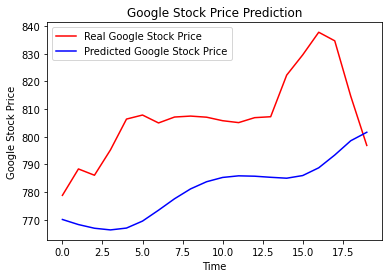

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')   #creating the plot
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()